In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('/Users/chldu/uci-secom.csv')

In [3]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
# 데이터에 있는 nan 값들을 찾아보자

data.isnull().any().any()

True

## 결측값

In [6]:
# 결측값의 개수 구하기

d = data.isnull().sum()

In [7]:
# 개수가 900개 넘어가는 것 뽑기

j = []

for i in d.keys():
    if(d[i]>900):
        print(i,d[i])
        j.append(i)

85 1341
109 1018
110 1018
111 1018
157 1429
158 1429
220 1341
244 1018
245 1018
246 1018
292 1429
293 1429
358 1341
382 1018
383 1018
384 1018
492 1341
516 1018
517 1018
518 1018
578 949
579 949
580 949
581 949


In [8]:
data.drop(j, axis=1, inplace=True)
data

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [9]:
data.replace(np.nan, 0, inplace=True)
data

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [10]:
# 결측값이 있는지 없는지 다시 확인해보자


data.isnull().any().any()          # 없다!

False

# scaling

In [11]:
# 데이터 X 와 y로 분류 하자

X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [12]:
# train_test 를 split 해서 나타내 보자

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [13]:
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (1175, 566)
shape of X_test:  (392, 566)
shape of y_train:  (1175,)
shape of y_test:  (392,)


In [14]:
# scaling

from sklearn.preprocessing import StandardScaler

In [15]:
# train 에는 fit_transform // test 에는 fit 하면 안되고 train 만 해서 한다

sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)
sc_X = sc.fit_transform(X)

In [16]:
pd.DataFrame(sc_X)

,0,1,2,3,4,5,6,7,8,9,...,556,557,558,559,560,561,562,563,564,565
0,0.139998,0.429208,0.032735,0.059342,-0.049911,0.094946,-0.228536,0.239971,0.436850,1.128343,...,-0.229797,-0.135520,0.055275,-0.204269,-0.092516,-0.196519,-1.734706,-1.868461,-1.840769,-1.061159
1,0.464020,-0.105874,0.236852,0.173847,-0.059375,0.094946,0.187826,0.278951,0.393723,0.022511,...,-0.263493,-0.460054,0.162312,0.407145,0.445214,0.385516,-0.958144,0.412587,0.251029,1.156951
2,-0.351256,0.407233,0.026413,0.684661,-0.047236,0.094946,-0.415634,0.232175,-0.192349,0.327111,...,-0.205046,-0.590505,-0.304064,0.022827,0.015030,0.030373,2.989383,3.624211,3.318999,-0.178407
3,-0.070903,-0.025985,0.086766,-1.033387,-0.050620,0.094946,0.354494,0.045074,0.300837,-0.765478,...,-0.224950,-0.645708,-0.059408,-0.291614,-0.361381,-0.282803,-0.100689,-0.177535,-0.306784,-0.274469
4,0.146544,0.098340,0.250931,-0.125070,-0.046823,0.094946,0.016475,0.185400,0.465600,-0.149655,...,-0.230791,-0.454486,-1.512057,26.860983,27.062850,26.907579,-0.100689,-0.177535,-0.306784,-0.274469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-0.517139,-0.110096,-0.005517,3.708612,-0.047698,0.094946,-1.581192,0.286746,-1.311414,-0.242360,...,-0.240947,-0.393931,-0.074699,-0.058694,0.015030,-0.055631,-1.184641,-0.302368,-0.202194,1.103337
1563,0.246823,0.204859,0.084535,-0.565054,-0.058538,0.094946,-0.153221,-0.048477,-0.306246,-0.348308,...,-0.268684,0.095786,-0.174091,-0.128570,-0.065629,-0.123601,-1.184641,-0.302368,-0.202194,1.103337
1564,-0.120418,-0.567887,0.121512,-0.595924,-0.059478,0.094946,-0.070186,-0.025089,-16.155624,0.055619,...,-0.256565,0.086877,-0.082344,-0.000465,0.068803,-0.001920,-0.141135,-0.892490,-0.969186,-0.597485
1565,-0.539573,0.256061,-0.018427,-0.436304,-0.046124,0.094946,-0.124269,0.013890,0.013330,-0.421147,...,-0.227906,0.205751,0.047630,0.145110,-0.011856,0.139891,0.384663,0.911921,0.773979,-0.065118


## 주성분 분석

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=0.85) #PCA 객체 생성 (주성분 갯수 0.85개 생성)
principalComponents = pca.fit_transform(sc_X)

# dataFrame -- pandas의 주요 유형 중 하나, series 자료 구조를 모아둔 형태
principalDf = pd.DataFrame(data = principalComponents)


np_Df = principalDf.to_numpy  # pandas 를 numpy 형식으로 변경 나중에 쓸일이 있을지도..

In [19]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,-1.480892,3.443087,4.556093,-2.232184,0.885531,-1.750156,1.411821,2.036742,0.768743,-0.998271,...,-1.978389,-1.640996,-0.631491,-0.069233,0.430680,0.122708,-0.782225,-2.126332,0.699609,0.674416
1,-1.989067,1.429700,3.487361,-1.856899,1.680818,-2.511428,0.874279,3.376972,-0.995468,-0.482618,...,-0.968337,-0.464505,1.746610,-0.112332,0.651566,1.513998,1.104444,0.510013,0.187142,0.617557
2,0.264950,0.942759,0.643228,-0.361364,-0.015905,0.323023,-0.804382,2.185448,-0.887683,1.684722,...,0.868783,3.323481,-0.823437,-0.373998,-1.230204,4.274918,-0.787184,-0.104358,1.879640,0.984710
3,0.423280,1.710080,-2.255846,5.844296,-0.866750,0.289288,-0.026192,25.742741,18.438800,16.554750,...,1.631955,-0.601355,0.502127,-3.025899,3.316678,-4.649706,-0.980783,-3.603541,1.912542,-0.821435
4,0.302437,3.314989,3.017150,-0.204792,0.107710,0.579850,-0.736321,2.274743,5.860552,1.713185,...,1.510240,-0.489043,1.842977,-2.015589,1.419746,-1.405011,-1.480750,3.123900,2.284525,-0.352683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1.279091,-4.394633,-3.994319,4.977084,1.495699,0.472086,-1.972459,0.375644,1.462248,-2.144301,...,1.412541,-0.648601,0.436758,0.667039,0.198648,-0.219622,-0.434466,-0.248356,1.567079,1.024875
1563,-0.381968,0.069666,1.243167,0.564084,1.101920,-1.235559,0.295034,4.483768,-1.984628,-2.560960,...,-1.186694,-2.281451,0.573762,0.045348,-0.410490,-1.237799,-0.145078,-1.167611,-0.961543,0.742751
1564,-1.135744,-0.977762,-17.543619,-5.067267,55.976869,-2.741146,-0.260357,-2.810107,2.951807,-2.642046,...,-0.955336,0.914713,1.102924,0.121679,1.278490,-0.755959,-0.445384,-0.036693,-1.553303,-0.452818
1565,-1.145397,-4.149672,-3.887361,1.943701,1.282016,0.101448,-2.176326,-0.293376,1.848950,-5.863599,...,2.488764,1.264039,-2.167528,0.789507,0.972609,0.290541,-1.006687,0.713894,0.182323,-0.166799


In [20]:
# Explained Variance Ratio은 각각의 주성분 벡터가 이루는 축에 투영(projection)한 결과의 분산의 비율
print('Variance of each component:', pca.explained_variance_ratio_)

# 주성분 개수
print('\nTotal features:', pca.n_components_)

# 종속변수
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.05709479 0.03789838 0.02926733 0.026212   0.0233862  0.02204847
 0.01901021 0.0180492  0.01772505 0.01610313 0.01516086 0.01469317
 0.01441183 0.01372107 0.01361552 0.01341125 0.01299468 0.01256908
 0.01218771 0.01167496 0.0113639  0.01113073 0.01086963 0.01057798
 0.01016699 0.01001149 0.00994223 0.00970551 0.00935605 0.0089403
 0.00874376 0.00862317 0.00825497 0.00808178 0.00793076 0.00782306
 0.00769352 0.00753651 0.00746202 0.00728226 0.00720195 0.00708609
 0.00686254 0.00671258 0.00663692 0.00662037 0.00655481 0.00648975
 0.00625613 0.00607661 0.00598806 0.00594888 0.0058418  0.00576625
 0.00565627 0.00546543 0.0053996  0.00538472 0.00528264 0.00521017
 0.00510636 0.0050399  0.00500063 0.00499131 0.00481333 0.00475621
 0.0046536  0.00465065 0.00451614 0.00449709 0.00434361 0.00431796
 0.00421254 0.00415984 0.00410826 0.00407413 0.00385752 0.00382976
 0.00373831 0.00357884 0.00354508 0.003491   0.00340439 0.00335632
 0.00329752 0.00320668 0.00311863 0

In [21]:
# 앞서 standard scaling 적용한 데이터에 pca 로 변환 시켜주기

pca_X_train = pca.transform(sc_X_train)
pca_X_test = pca.transform(sc_X_test)

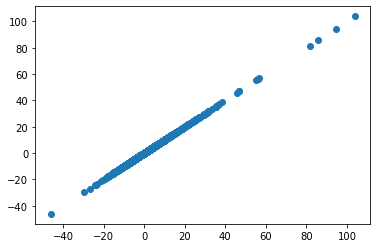

In [24]:
# pca 적용한 scaling 값의 분포도를 알아보기...// 근데 이렇게 하는게 맞는건지 잘 모르겟어요

plt.scatter(principalComponents[:,1:-1],principalComponents[:,1:-1])

## Randomforest classifier #1

###### 이거는 내가 공부해 본 것 중에서 제일 잘나와있는거 따라해본건데 정확히 어떤 의민지 몰라서 차차 확인해보던가 해야할듯

In [25]:
# cross validation accuracy
cv_acc = {}

# cross validation true positive rate   --- TP / (FN + TP)
cv_TPR = {}

# cross validation false positive rate  --- FP / (FP + TN)
cv_FPR = {}

In [26]:
# 그래프로 나타내는 함수 설정
def plot_result(model, name:str):
    model.fit(pca_X_train, y_train)
    
    # 예측값
    y_pred = model.predict(pca_X_test)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores = cross_val_score(model, pca_X_test, y_test, cv=10, scoring = 'balanced_accuracy')
    cv_acc[name] = round(scores.mean(), 4)*100  # balanced accuracy
    cv_TPR[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  # recall (Max)
    cv_FPR[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100  # fallout (Min)
    
    print('Average Balanced Accuracy (CV=10):', scores.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot Confusion Matrix
    plot_confusion_matrix(model, pca_X_test, y_test)
    plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

Average Balanced Accuracy (CV=10): 0.5
              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       367
           1       0.00      0.00      0.00        25

    accuracy                           0.94       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.88      0.94      0.91       392



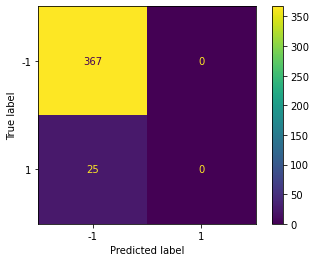

In [28]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
plot_result(rfc, "rfc")

### 부록?

### oob sample

-- (oob_score의 oob는 out-of-bag의 약자로, 부트스트랩 샘플링 시 선택되지 않은 샘플을 뜻한다. oob_score를 true로 하면 훈련 종료 후 oob 샘플을 기반으로 평가를 수행한다.)

In [29]:
# 모델 학습
model = RandomForestClassifier(n_estimators=10, random_state=0,
                              max_features=4, oob_score=True)
model.fit(pca_X_train, y_train)

# 평가
print("train 세트 정확도: {:.4f}".format(model.score(pca_X_train, y_train)) )
print("test 세트 정확도: {:.4f}".format(model.score(pca_X_test, y_test)) )
print("OOB 샘플의 정확도: {:.4f}".format(model.oob_score_) )

train 세트 정확도: 0.9898
test 세트 정확도: 0.9337
OOB 샘플의 정확도: 0.9200


## Randomforest Classifier #2

###### GRIDCV 이용한 randomforest classifier

In [30]:
rf_clf = RandomForestClassifier()

In [31]:
estimators = [rf_clf]

for estimator in estimators:
    estimator.fit(pca_X_train, y_train)
    pred = estimator.predict(pca_X_test)
    class_name = estimator.__class__.__name__
    print('{} 분류기 정확도: {:.4f}'.format(class_name, accuracy_score(y_test, pred)))   #randomforest 로 했을때 accuracy score

RandomForestClassifier 분류기 정확도: 0.9260


In [32]:
params = {
    'n_estimators':[100],
    'max_depth':[2 ,4 ,6, 8, 10, 12],
    'min_samples_leaf':[2 ,4, 6, 8, 12, 18],
    'min_samples_split':[2 ,4, 6, 8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# n_jobs = -1 을 지정하면 모든 CPU 코어를 이용해 학습 가능
rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(pca_X_train, y_train)

print('최적의 하이퍼 파라미터 :',grid_cv.best_params_)
print('최적의 예측 정확도 : {:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼 파라미터 : {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
최적의 예측 정확도 : 0.9328


## Randomforest classifier #3

###### 그냥 randomforest 만 해서 나타낸 것

In [73]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(pca_X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [74]:
pred = rf.predict(pca_X_test)

In [75]:
print('score:  {:.4f}'.format(rf.score(pca_X_test, y_test)))

score:  0.9260


In [76]:
print('accuracy score: {:.4f}'.format(accuracy_score(y_test, pred)))
print('precision_score: {:.4f}'.format(average_precision_score(y_test, pred)))
print('recall_score: {:.4f}'.format(recall_score(y_test, pred)))
print('f1_score: {:.4f}'.format(f1_score(y_test, pred)))
cm = confusion_matrix(y_test, pred)
print('confusion matrix_test {}'.format(cm))

MSE = mean_squared_error(y_test, pred) 
print('rmse: {:.4f}'.format(np.sqrt(MSE)))

accuracy score: 0.9260
precision_score: 0.0638
recall_score: 0.0000
f1_score: 0.0000
confusion matrix_test [[363   4]
 [ 25   0]]
rmse: 0.5440


## correlation 및 scatter? 그림으로 나타내보기

Text(0.5, 1.0, 'Data--correlation')

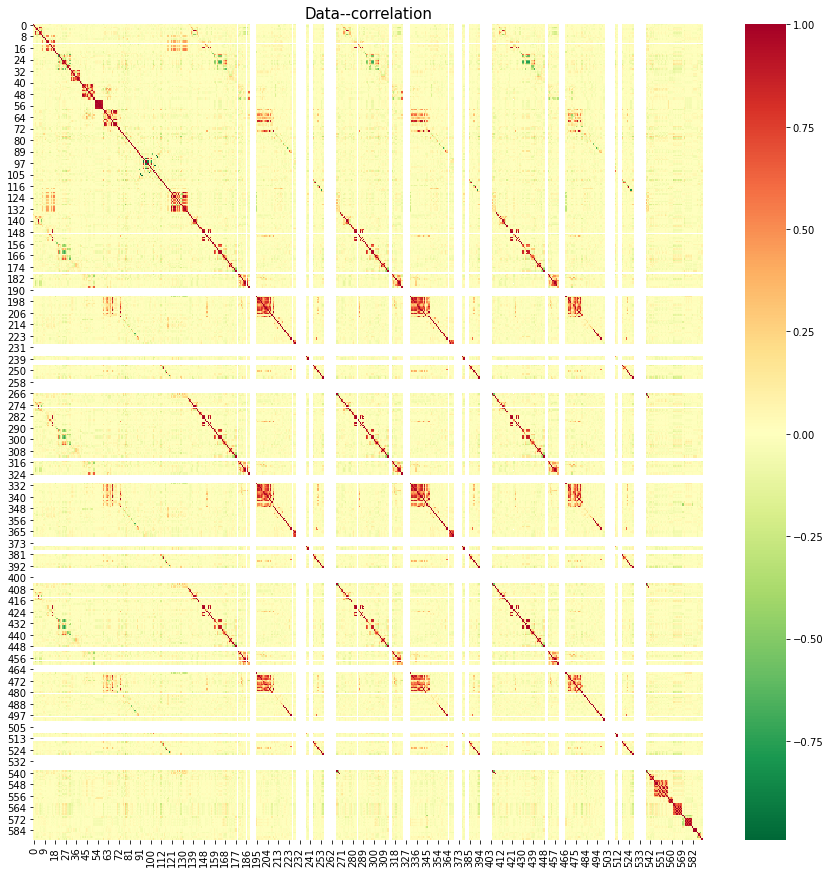

In [77]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.heatmap(data.corr(), cmap = "RdYlGn_r")
plt.title('Data--correlation', fontsize = 15)